# Testing
I made this notebook just to mess around with the data and test out some of the preprocessing steps. 

**To do**
* Load the data
* Some visualizations
* Preprocessing
    * Try out most popular libraries : sklearn and NLTK
    * Feature extraction
        * First step is probably classifying by word or ngram frequency using vector representation ("bag of words")
        * Graph representation much more complex but would be fun to try if we have time
        * Tokenization (getting a bunch of features from the text for each sample)
        * Vectorization (create numeric feature matrix)
        * Normalization
            * term frequency (tf-idf)
            * term frequency-inverse document frequency (tf-idf)
            * Many other possibilities
* Feature selection
    * Removing stop words
    * Statistical feature selection (chi squared, mutual info, etc.)
    * PCA
* Model selection
* Training
* Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Feature Extraction 

In [2]:
data = pd.read_csv('mbti_1.csv')
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


This is a 16 class classification problem, with each sample consisting of a collection of strings.

In [3]:
classes = pd.unique(data['type'])
print('Classes:')
print(classes)
print()
print('Example posts:')
print(data.loc[0, 'posts'].split('|||')[:4])

Classes:
['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']

Example posts:
["'http://www.youtube.com/watch?v=qsXHcwe3krw", 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg', 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks', 'What has been the most life-changing experience in your life?']


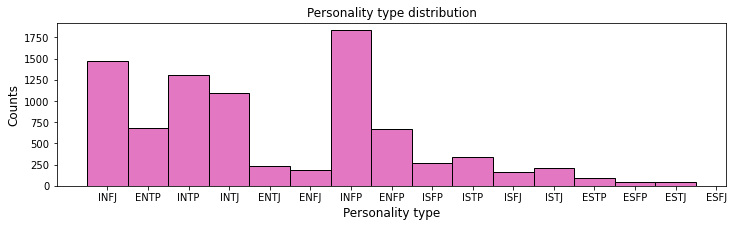

In [4]:
ax = data['type'].hist(figsize=(12, 3), bins=np.arange(16)-0.5, ec='k', color='tab:pink', grid=False)
ax.set_xlabel('Personality type', fontsize='large')
ax.set_ylabel('Counts', fontsize='large')
ax.set_title('Personality type distribution', fontsize='large');

The class labels should be changed to integers.

In [5]:
mapping = {c: i for i, c in enumerate(classes)}
data = data.replace(mapping)
data

,type,posts
0,0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,1,'I'm finding the lack of me in these posts ver...
2,2,'Good one _____ https://www.youtube.com/wat...
3,3,"'Dear INTP, I enjoyed our conversation the o..."
4,4,'You're fired.|||That's another silly misconce...
...,...,...
8670,8,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,7,'So...if this thread already exists someplace ...
8672,2,'So many questions when i do these things. I ...
8673,6,'I am very conflicted right now when it comes ...


Learn the vocabulary and count the frequencies.

In [6]:
vectorizer = CountVectorizer(input='content')
X = vectorizer.fit_transform(list(data['posts']))
X = X.toarray()
Xdf = pd.DataFrame(X, columns=list(vectorizer.vocabulary_.keys()))
Xdf

,http,www,youtube,com,watch,qsxhcwe3krw,41,media,tumblr,tumblr_lfouy03pma1qa1rooo1_500,...,madrabbit,6eew,9ndm5k,mi6,i1gmxmtwugs,43579,_top,solitude315,elpmmet69ce,ausse
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The document-term matrix is very sparse matrix and there are lots of features here. I'm sure there is lots we can do to remove some of these features, or choose better features. Let's extract the dictionary of all the words in the order defined above, as well as a version which is sorted by frequency, with largest frequency first.

In [7]:
vocab_dict = vectorizer.vocabulary_
vocab_dict_sortbyfreq = {
    w: f for w, f in sorted(vocab_dict.items(), key=lambda x: x[1], reverse=True)
}

Here are the frequencies of the first few words in the dictionary.

In [8]:
[(word, freq) for (word, freq) in vocab_dict.items()][:30]

[('http', 67533),
 ('www', 140824),
 ('youtube', 143422),
 ('com', 37726),
 ('watch', 137735),
 ('qsxhcwe3krw', 105905),
 ('41', 8711),
 ('media', 85605),
 ('tumblr', 129774),
 ('tumblr_lfouy03pma1qa1rooo1_500', 129891),
 ('jpg', 75545),
 ('enfp', 51058),
 ('and', 22493),
 ('intj', 72511),
 ('moments', 88382),
 ('https', 67535),
 ('iz7le1g4xm4', 73880),
 ('sportscenter', 120105),
 ('not', 93194),
 ('top', 128126),
 ('ten', 125423),
 ('plays', 101237),
 ('ucdfze1etec', 131701),
 ('pranks', 102890),
 ('what', 138611),
 ('has', 64506),
 ('been', 28090),
 ('the', 126055),
 ('most', 88931),
 ('life', 80811)]

And here are some of the most common words.

In [9]:
[(word, freq) for (word, freq) in vocab_dict_sortbyfreq.items()][:30]

[('ﾟﾟ', 145411),
 ('ﾟдﾟщ', 145410),
 ('ﾉﾟ', 145409),
 ('ﾉﾞ', 145408),
 ('ﾉｼ', 145407),
 ('ﾉωﾉ', 145406),
 ('ｗｈｙu3000ｉｓu3000ａｎｙｏｎｅu3000ｓｔｉｌｌu3000ｄｉｓｃｕｓｓｉｎｇu3000ｔｈｉｓ', 145405),
 ('ｖａｐｏｒｗａｖｅ', 145404),
 ('ｔｒｕｍｐu3000ｉｓu3000ａｎu3000ｅｓｔｐ', 145403),
 ('ｓｏ', 145402),
 ('ｓｈｅ', 145401),
 ('ｒｅｓｐｅｃｔu3000ｫｬｩｧ', 145400),
 ('ｐｓｙ', 145399),
 ('ｏｎ', 145398),
 ('ｏｄ', 145397),
 ('ｎｅｓｓ', 145396),
 ('ｍｕｃｈ', 145395),
 ('ｍｅ', 145394),
 ('ｈｅu3000ｉｓu3000ｔｈｅu3000ｍｏｓｔu3000ｅｓｔｐu3000ｅｓｔｐu3000ｉｎu3000ｔｈｅu3000ｈｉｓｔｏｒｙu3000ｏｆu3000ｅｓｔｐ',
  145393),
 ('ｆｕｎ', 145392),
 ('ｅｘａｃｔｌｙ', 145391),
 ('ｄａｙｕｍ', 145390),
 ('ｃｙｂｅｒｐｕｎｋ', 145389),
 ('ａｍu3000ｉu3000ｄｒｅａｍｉｎｇ', 145388),
 ('０００', 145387),
 ('유재석', 145386),
 ('안녕하세요', 145385),
 ('아저씨', 145384),
 ('사랑', 145383),
 ('보아', 145382)]

Wow, so there are lots of characters from outside the English alphabet. The second to last entry (사랑) means 'love' in Korean and is referencing this video: https://www.youtube.com/watch?v=kWIpynw5cHI.

## Classification

Split into a training and testing set. For now choose a 2:1 ratio.

In [10]:
y = data['type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Training samples: {}'.format(len(y_train)))
print('Testing samples: {}'.format(len(y_test)))

Training samples: 5812
Testing samples: 2863


Try to classify with a linear SVM.

In [11]:
clf = svm.LinearSVC()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy = 0.58
Confusion matrix:


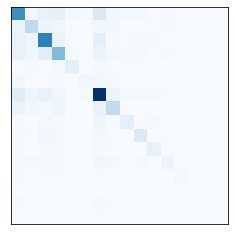

In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy = {:.2f}'.format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
fig, ax = plt.subplots()
ax.imshow(cm, cmap='Blues')
ax.set_xticks([])
ax.set_yticks([]);

Above 50%... not bad. Maybe normalize each count vector to the range [0, 1]. In the future we can use the `sklearn.preprocessing` module to do this, but for now I'll just do it manually.

In [13]:
def normalize(X):
    return np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, X)

X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

Accuracy = 0.64
Confusion matrix:


[]

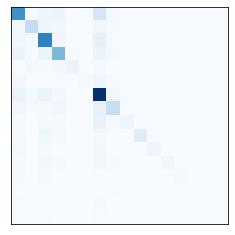

In [14]:
clf.fit(X_train_norm, y_train)
y_pred = clf.predict(X_test_norm)
print('Accuracy = {:.2f}'.format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
fig, ax = plt.subplots()
ax.imshow(cm, cmap='Blues')
ax.set_xticks([])
ax.set_yticks([])

That improved the accuracy a bit. Try the tf-idf normalization.

Accuracy = 0.66
Confusion matrix:


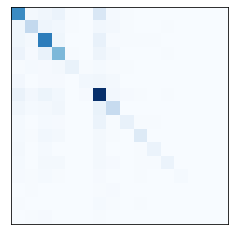

In [15]:
vectorizer = TfidfVectorizer(input='content')
X = vectorizer.fit_transform(list(data['posts'])).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy = {:.2f}'.format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
fig, ax = plt.subplots()
ax.imshow(cm, cmap='Blues')
ax.set_xticks([])
ax.set_yticks([]);

A few percent better.

## Thoughts

There is a lot we can do for this project, we just need to decide what we're going to try. Also, I don't think Dr. Qi has ever mentioned if we can use external libraries for our work... we don't need to only use methods that we build, right?